In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

df = pd.read_csv("D:/data-analyst-portfolio/data/Walmart_Sales.csv")
#pd.set_option("display.float_format", "{:,.2f}".format)

# Дата на исходнике

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Флаг праздника

df["Holiday_Flag"] = df["Holiday_Flag"].astype(int).astype(bool)


# Признаки времени

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.isocalendar().week.astype(int)

df["Weekly_Sales"] = pd.to_numeric(df["Weekly_Sales"], errors="coerce")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,False,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,True,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,False,46.50,2.625,211.350143,8.106,2010,3,9


Fast quality check

In [8]:
df.shape
df.isna().sum()
df.duplicated().sum()
(df["Weekly_Sales"] < 0).sum()
df.describe()

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000
std,12.988182,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201


No omissions, no duplicates, sales are non-negative, types are listed.

1. What are the top stores in terms of total sales for the entire period?

2. Is there seasonality: which months/weeks show peaks?

3. Do holidays have an impact: sales on holidays vs. non-holidays (overall and by store)?

4. What factors are associated with sales: Temperature, Fuel_Price, CPI, Unemployment (correlations/comparisons)?

5. Are there any outliers (unusually high weeks) and at which stores?

In [9]:
df.to_csv("D:/data-analyst-portfolio/data/Walmart_clean.csv")

Top 10 Shops

In [24]:
Top_Stores = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)
Top_Stores

Store
20   301,397,792.46
4    299,543,953.38
14   288,999,911.34
13   286,517,703.80
2    275,382,440.98
10   271,617,713.89
27   253,855,916.88
6    223,756,130.64
1    222,402,808.85
39   207,445,542.47
Name: Weekly_Sales, dtype: float64

Sales are concentrated in a subset of stores. Store 20 is the top contributor over 2010–2012.

Holiday/Non-Holiday

In [25]:
df.groupby('Holiday_Flag')["Weekly_Sales"].agg(["count","mean","sum"])

,count,mean,sum
Holiday_Flag,,,
False,5985,"1,041,256.38","6,231,919,435.55"
True,450,"1,122,887.89","505,299,551.56"


“Holiday weeks show higher average weekly sales, but total sales remain dominated by non-holiday weeks due to sample size.”

Sales Correlation to Factors (Temperature - Fuel_Price - CPI - Unemployment)

In [26]:
df[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]].corr(numeric_only=True)


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.00,-0.06,0.01,-0.07,-0.11
Temperature,-0.06,1.00,0.14,0.18,0.10
Fuel_Price,0.01,0.14,1.00,-0.17,-0.03
CPI,-0.07,0.18,-0.17,1.00,-0.30
Unemployment,-0.11,0.10,-0.03,-0.30,1.00


Overall linear correlations with macro and weather variables are weak; further analysis may require store-level segmentation and non-linear/lagged effects.

Graphs


1. Overall Sales Dynamic - All Stores

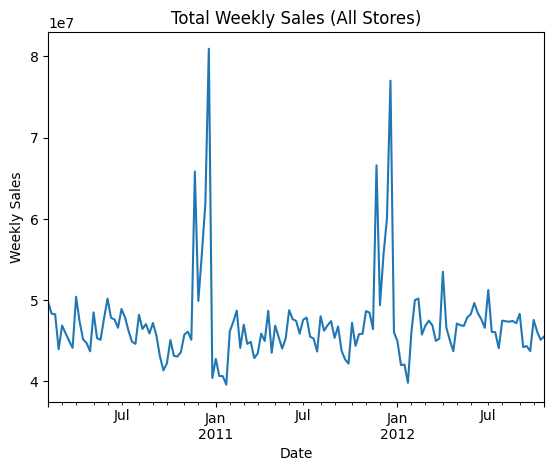

In [27]:
ts = df.groupby("Date")["Weekly_Sales"].sum().sort_index()

ts.plot()
plt.title("Total Weekly Sales (All Stores)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

Conclusion: Graph shows us that most of sales are made at November - December with the highest selling rate at Mid November - End of December

2. Average Sales by month

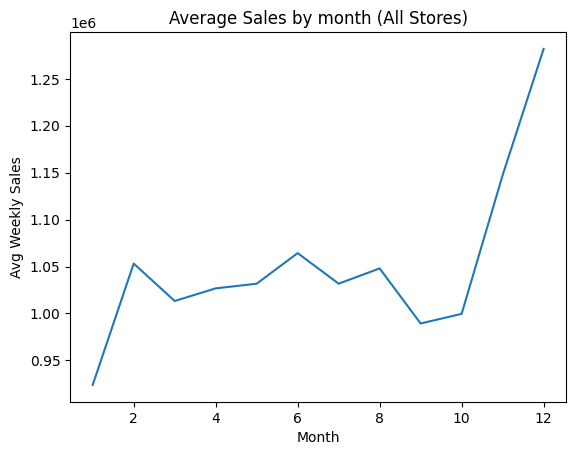

In [28]:
by_month = df.groupby("Month")["Weekly_Sales"].mean()

by_month.plot()
plt.title("Average Sales by month (All Stores)")
plt.xlabel("Month")
plt.ylabel("Avg Weekly Sales")
plt.show()

Seasonality (monthly average):

Peak average weekly sales occur in December (~1.28M) and November (~1.15M).

The lowest month is January (~0.92M).

This suggests a strong year-end demand effect (likely holidays and seasonal shopping).

3. Average Holiday/Non-Holiday

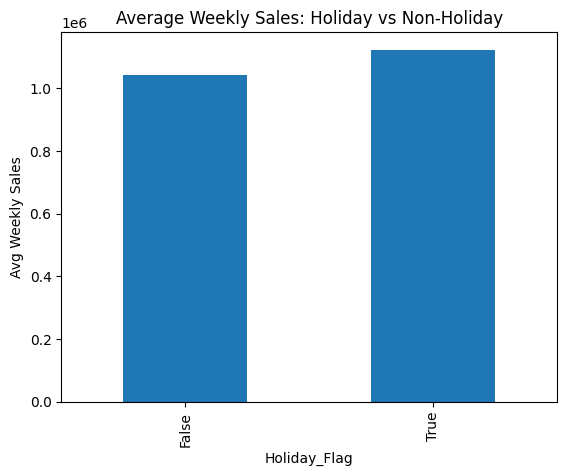

In [29]:
hv = df.groupby("Holiday_Flag")["Weekly_Sales"].mean()

hv.plot(kind = "bar")
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday_Flag")
plt.ylabel("Avg Weekly Sales")
plt.show()

Conclusion: Holiday Sales are slightly higher than Non-Holiday, but we need to keep in mind that amount of Non-Holiday Days are higher than amount of Holiday.

4. Top 10 Stores by Overall Sales

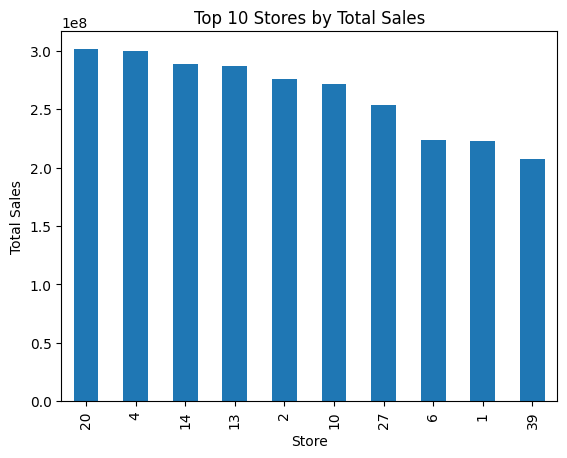

In [30]:
top10 = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)

top10.plot(kind = "bar")
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")

plt.show()

Conclusion: Leader of Sales is Store group 20 with +-3 billion sales, Store group 4 Sales are slightly lower - 2.9 billion sales. 

5. Weekly Sales Check (Long Tail)

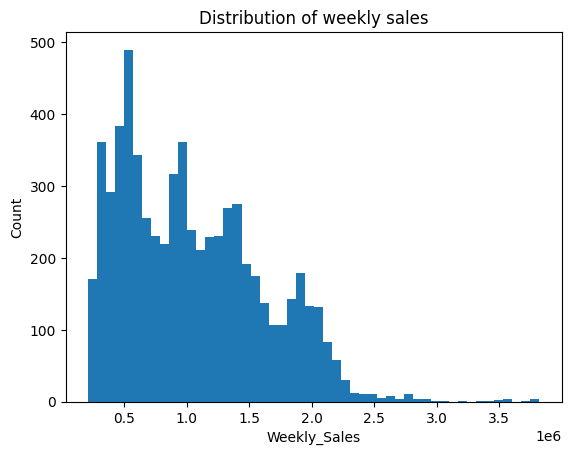

In [31]:
df["Weekly_Sales"].plot(kind = "hist", bins = 50)

plt.title("Distribution of weekly sales")
plt.xlabel("Weekly_Sales")
plt.ylabel("Count")

plt.show()

Conclusion:

6. Top 10 Weeks (All Stores)

In [32]:
total_week = df.groupby("Date")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)

total_week

Date
2010-12-24   80,931,415.60
2011-12-23   76,998,241.31
2011-11-25   66,593,605.26
2010-11-26   65,821,003.24
2010-12-17   61,820,799.85
2011-12-16   60,085,695.94
2010-12-10   55,666,770.39
2011-12-09   55,561,147.70
2012-04-06   53,502,315.87
2012-07-06   51,253,021.88
Name: Weekly_Sales, dtype: float64

In [33]:
flag_by_date = df.groupby("Date")["Holiday_Flag"].max()
total_week.to_frame("Total_Sales").join(flag_by_date)

,Total_Sales,Holiday_Flag
Date,,
2010-12-24,"80,931,415.60",False
2011-12-23,"76,998,241.31",False
2011-11-25,"66,593,605.26",True
2010-11-26,"65,821,003.24",True
2010-12-17,"61,820,799.85",False
2011-12-16,"60,085,695.94",False
2010-12-10,"55,666,770.39",False
2011-12-09,"55,561,147.70",False
2012-04-06,"53,502,315.87",False


Peak weeks:

The highest total sales weeks cluster in late November and December (e.g., 2010-12-24 ~80.9M; 2011-12-23 ~77.0M).

Some peak weeks are marked as Holiday, but several top weeks are Non-holiday, indicating that elevated demand extends beyond the exact holiday-flagged weeks.

7. Anomalies in Store Sales (z score)

In [34]:
def top_anomalies_per_store(df, n=3):
    out = []
    for store, g in df.groupby("Store"):
        x = g["Weekly_Sales"]
        mu = x.mean()
        sd = x.std(ddof=0)
        if sd == 0 or np.isnan(sd):
            continue
        z = (x - mu) / sd
        idx = z.abs().sort_values(ascending = False).head(n).index
        part = g.loc[idx,["Store","Date","Weekly_Sales","Holiday_Flag"]].copy()
        part["z_abs"] = z.loc[idx].abs().values
        out.append(part)
    res = pd.concat(out).sort_values("z_abs",ascending = False)
    return res

anom = top_anomalies_per_store(df, n=2)
anom.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,z_abs
6338,45,2010-12-24,"1,682,862.03",False,6.91
2906,21,2010-12-24,"1,587,257.78",False,6.48
2620,19,2010-12-24,"2,678,206.42",False,6.45
189,2,2010-12-24,"3,436,007.68",False,6.38
4765,34,2010-12-24,"1,620,748.25",False,6.27
2048,15,2010-12-24,"1,368,318.17",False,6.20
3335,24,2010-12-24,"2,386,015.75",False,6.16
1333,10,2010-12-24,"3,749,057.69",False,6.14
2763,20,2010-12-24,"3,766,687.43",False,6.03
1762,13,2010-12-24,"3,595,903.20",False,6.02


We computed z-scores within each store to identify weeks that strongly deviate from that store’s usual sales level.

Weeks with large |z| (e.g., > ~5–6) represent unusually high/low sales relative to that store baseline.

Many top anomalies occur around late December (e.g., 2010-12-24), consistent with strong seasonal peaks rather than random noise.

8. Holiday effect on Sales

In [35]:
holiday_store = (
    df.groupby(["Store","Holiday_Flag"])["Weekly_Sales"].mean().unstack()
)

holiday_store["lift"] = holiday_store[True] / holiday_store[False] - 1
holiday_store.sort_values("lift",ascending=False).head(10)

Holiday_Flag,False,True,lift
Store,,,
7,"562,964.45","672,400.27",0.19
35,"908,099.15","1,074,348.46",0.18
15,"617,064.84","706,406.02",0.14
5,"314,892.28","359,501.61",0.14
12,"999,291.92","1,138,140.42",0.14
29,"534,375.76","606,957.89",0.14
28,"1,311,888.98","1,478,244.60",0.13
10,"1,883,309.43","2,113,755.95",0.12
17,"887,099.02","979,796.97",0.10


Holiday effect is not uniform across stores.

Example: Store 7 has ~+19.4% lift, Store 35 ~+18.3%, Store 15 ~+14.5%.

This suggests store-specific drivers (location, customer mix, local demand) and supports segmented planning rather than one global holiday assumption.

Cleaning for PowerBi

In [15]:
clean = df.copy()

# на всякий случай сортировка
clean = clean.sort_values(["Store", "Date"])

clean.to_csv("D:/data-analyst-portfolio/data/Walmart_clean.csv", index=False)
clean.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,False,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,True,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,False,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,False,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,False,46.50,2.625,211.350143,8.106,2010,3,9
